### Import dos Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from tqdm import tqdm
import numpy as np

### Import dos Dados

In [2]:
# leitura do arquivo
df = pd.read_csv('CC GENERAL.csv')

In [3]:
# manutenção somente da coluna de interesse
df = df[df.columns[1:]]

In [4]:
# formato do df
df.shape

(8950, 17)

In [5]:
# guarda nomes das colunas
dfcolumns = df.columns

# tipos dos dados
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
# exibindo primeiras 5 linhas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# verificando se há dados faltantes
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Aqui vemos que há 313 ou 314 valores faltantes no dataframe. Este valor representa cerca de 3,5% do total dos dados. Vamos, para simplificar a análise, excluir os casos de dados faltantes.

In [8]:
# excluindo entradas com valores  faltantes
df.dropna(inplace=True)

# formato final do DF
df.shape

(8636, 17)

### Normalizando os dados

In [9]:
# instanciando o objeto
scaler = MinMaxScaler()

In [10]:
# aplicando a transformação e salvando em outro df
df_norm = scaler.fit_transform(df)

# voltando para um dataframe
df_norm = pd.DataFrame(df_norm, columns=dfcolumns)

# exibindo as 5 primeiras linhas
df_norm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


### Visualizando os Dados

Estes dados contém 17 colunas. Desta forma, somente é possível visualizar os dados fazendo uma redução de dimensionalidade. Vamos usar o PCA para esta tarefa:

In [11]:
pca = PCA(n_components=2)
df_aux = pca.fit_transform(df_norm)

In [12]:
pca.explained_variance_ratio_.cumsum()

array([0.50395523, 0.64573699])

Cerca de 65% da variância total é explicada pela redução aplicada

Text(0.5, 1.0, 'Plot dos Componentes Principais 1 e 2')

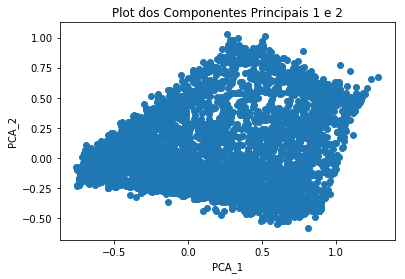

In [13]:
plt.scatter(df_aux[:,0], df_aux[:,1])
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Plot dos Componentes Principais 1 e 2')

A análise visual dos eixos não facilita a interpretação da quantidade de clusters ideal. Vamos realizar as análises de clusterização via KMeans e DBScan

### Clusterizando com o KMeans

In [14]:
# aux var para entender qtd ideal de clusters
scores = []

# for para testar qtd ideal de clusters
for i in tqdm(range(2,16)):
    kmeans = KMeans(n_clusters=i).fit(df_norm)
       
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df_norm.values, kmeans.labels_, metric='euclidean'))

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:26<00:00,  1.88s/it]


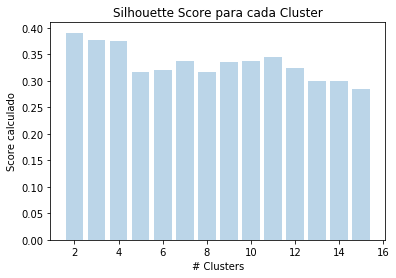

In [15]:
# Visualizando qtd de Clusters pelo K-Means

plt.figure(1)
plt.bar(range(2,16), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para cada Cluster')
plt.xlabel('# Clusters')
plt.ylabel('Score calculado')
plt.show()

A análise do Silhouette Score sugere que 2 clusters é a quantidade ideal, uma vez que maximiza o valor do Silhouette Score

Text(0.5, 1.0, 'Clusterização pelo KMeans')

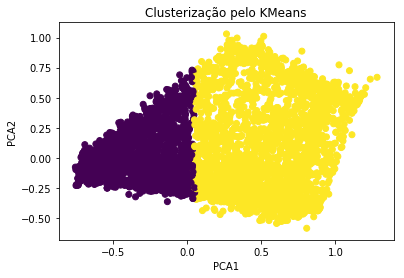

In [16]:
# Visualizando a Clusterização com o KMeans

kmeans = KMeans(n_clusters=2).fit(df_norm)
plt.scatter(df_aux[:,0], df_aux[:,1], c=kmeans.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusterização pelo KMeans')

### Clusterizando com o DBScan

Vamos entender visualmente o valor do epsilon primeiramente, para termos uma noção do intervalo de busca:

In [17]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)

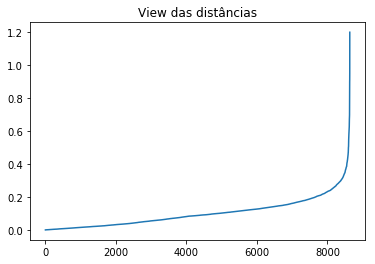

In [18]:
distances = np.sort(distances, axis=0)

distances = distances[:,1]
plt.plot(distances)
plt.title('View das distâncias')
plt.show()

Vamos utilizar o epsilon com valor de 0.2.

In [19]:
# aux var para entender a qtd mínima de amostras
scores = []

# for para testar qtd ideal mínima de amostras
for i in tqdm(range(2,15)):
    db = DBSCAN(eps=0.2, min_samples=i).fit(df_norm)
    # anexa o valor do silhouette_score
    scores.append(silhouette_score(df_norm, db.labels_))

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:47<00:00,  3.69s/it]


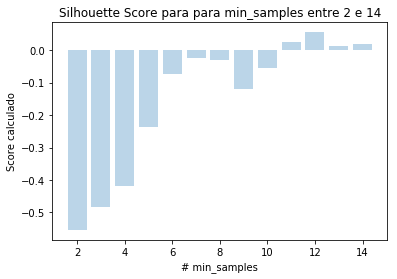

In [20]:
# Visualizando o Silhouette Score pela quantidade de amostras

plt.figure()
plt.bar(range(2,15), scores, align='center', alpha = 0.3)
plt.title('Silhouette Score para para min_samples entre 2 e 14')
plt.xlabel('# min_samples')
plt.ylabel('Score calculado')
plt.show()

In [21]:
db = DBSCAN(eps=0.2, min_samples=12).fit(df_norm)

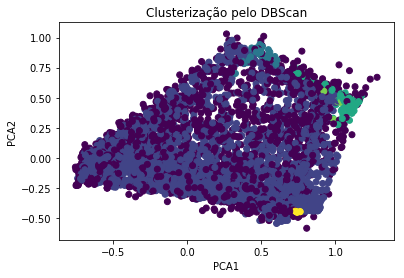

In [22]:
# Visualizando a Clusterização com o DBScan

db = DBSCAN(eps=0.2, min_samples=12).fit(df_norm)
plt.scatter(df_aux[:,0], df_aux[:,1], c=db.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusterização pelo DBScan');

## Respostas do Exercício

#### Qual a melhor quantidade de Clusters e técnica utilizada (DBScan ou KMeans)

Vemos que o melhor Silhouette Score obtido com o KMeans foi de cerca de 0.39. Com o DBScan, foi aproximadamente 0.07. Desta forma, o **melhor método foi o KMeans**. Para este método, o KMeans apresentou o melhor valor do Silhouette Score com **DOIS CLUSTERS**, que representa a melhor combinação para o problema. 